In [1]:
# use pandas to display and process data
import pandas as pd
from pandas import set_option
#set_option("display.max_rows", 10)

from scipy import stats

import seaborn as sns

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# %matplotlib qt5
# %matplotlib inline

<div class="alert alert-info">
### XRD measured mineralogical data for samples from Bo209

In [3]:
bo209=pd.read_csv('XRD_Bo209.csv')
bo209

,sample,methods,Quarz,K-Feldspat,Plagioklas,Calcit,Dolomit,depth
0,B209-49,Schultz,84,4,4,4,4,1630.05
1,B209-49,ADM,82,4,6,3,5,1630.05
2,B209-50,Schultz,51,2,6,3,38,1630.30
3,B209-50,ADM,44,7,8,3,38,1630.30
4,B209-51,Schultz,57,8,6,0,29,1630.90
5,B209-51,ADM,55,9,6,0,30,1630.90
6,B209-52,Schultz,65,4,3,0,28,1631.25
7,B209-52,ADM,57,5,7,0,31,1631.25
8,B209-53,Schultz,76,5,3,0,16,1631.65
9,B209-53,ADM,71,6,5,0,18,1631.65


<div class="alert alert-info">
### XRD analyses Schultz

<div class="alert alert-success">
There are some trends between minerals and depth, e.g. with increasing quartz content, the calcite content also increases, but the percentage of dolomite decreases. No strong increasing or decreasing mineral composition trend with increasing depth was observed.

In [4]:
# select data analysed by Schultz method
bo209_Schultz=bo209.loc[bo209['methods']=='Schultz']
bo209_Schultz
#deselect all samples with value of 0
#bo209_Schultz_clean=bo209_Schultz[(bo209_Schultz!=0).all(1)]
#bo209_Schultz_clean

,sample,methods,Quarz,K-Feldspat,Plagioklas,Calcit,Dolomit,depth
0,B209-49,Schultz,84,4,4,4,4,1630.05
2,B209-50,Schultz,51,2,6,3,38,1630.30
4,B209-51,Schultz,57,8,6,0,29,1630.90
6,B209-52,Schultz,65,4,3,0,28,1631.25
8,B209-53,Schultz,76,5,3,0,16,1631.65
10,B209-54,Schultz,40,21,8,0,31,1631.80
12,B209-55,Schultz,89,5,0,3,3,1632.20
14,B209-56,Schultz,83,6,4,4,3,1632.75
16,B209-57,Schultz,83,5,5,4,3,1633.20
18,B209-58,Schultz,44,3,3,0,50,1633.48


Text(0.5, 1.02, 'XRD measured mineralogical data (Schultz)')

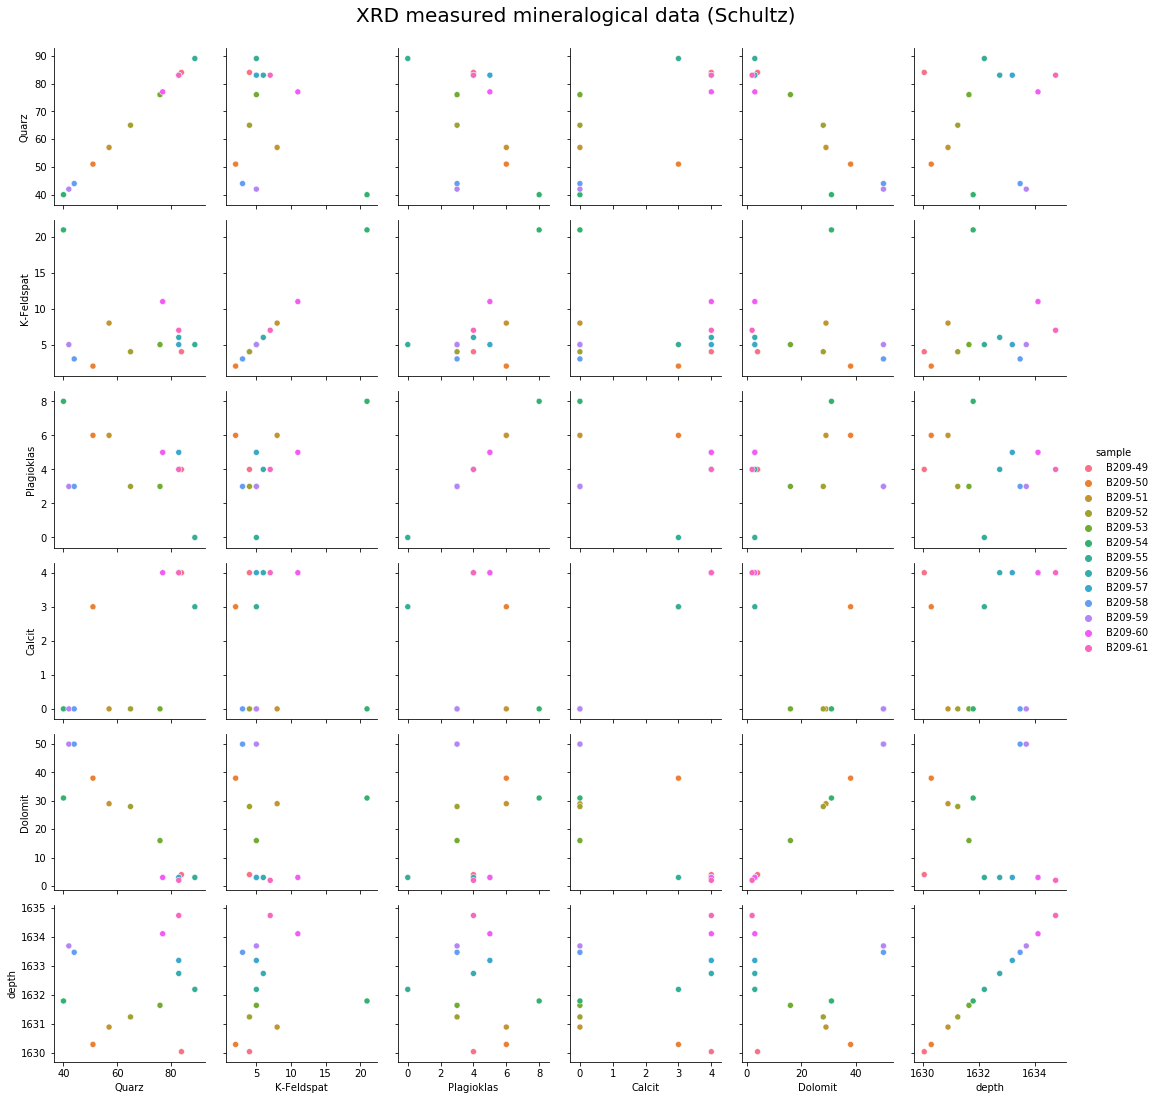

In [5]:
g = sns.PairGrid(bo209_Schultz, hue="sample")
g.map(sns.scatterplot)
g.add_legend()
g.fig.suptitle("XRD measured mineralogical data (Schultz)",y=1.02,size=20)

C:\Users\dell\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.02, 'XRD measured mineralogical data (Schultz)')

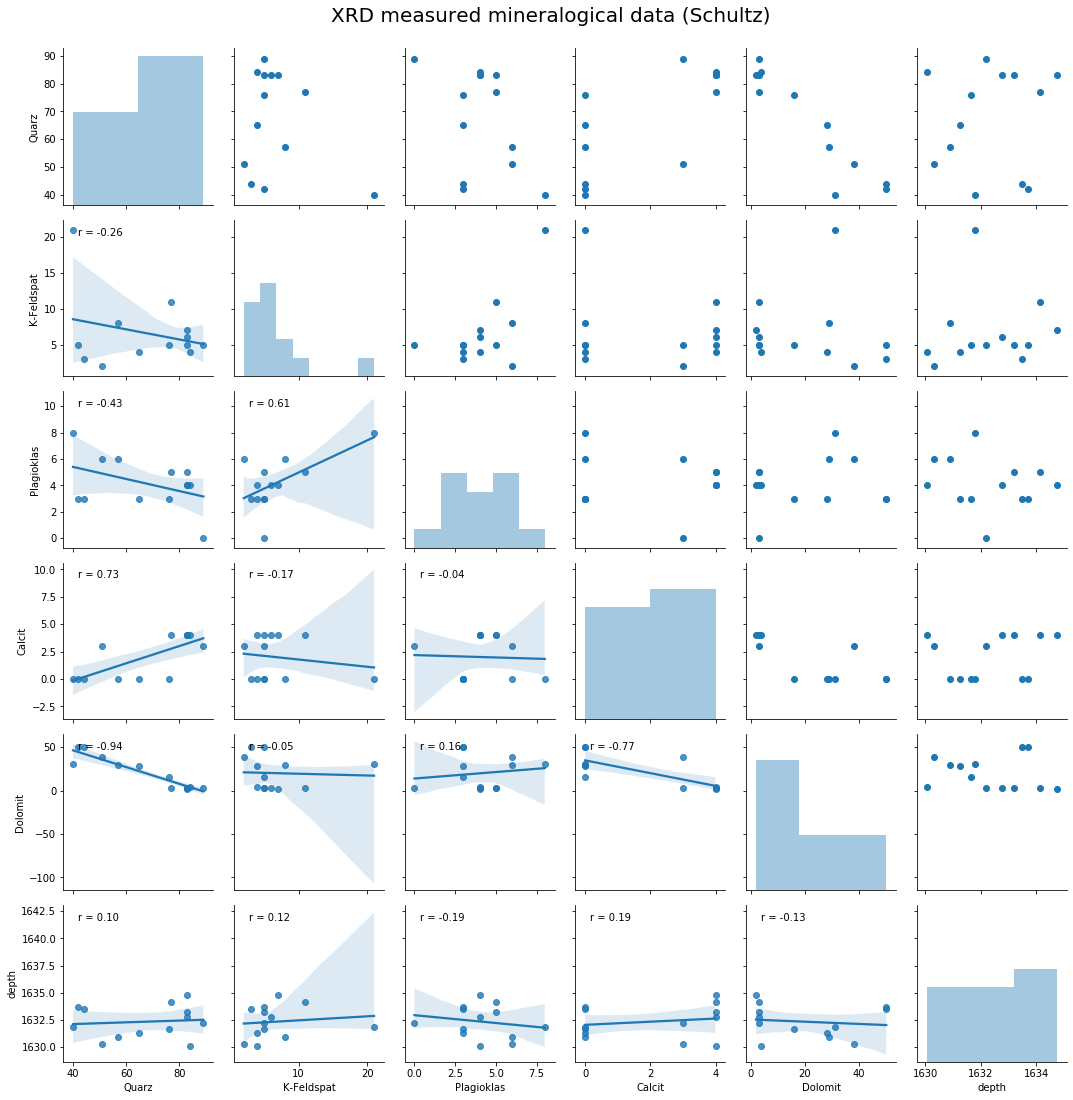

In [6]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(bo209_Schultz)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.regplot)
g.map_lower(corrfunc)
g.fig.suptitle("XRD measured mineralogical data (Schultz)",y=1.02,size=20)

Text(0, 0.5, 'Dolomit [%]')

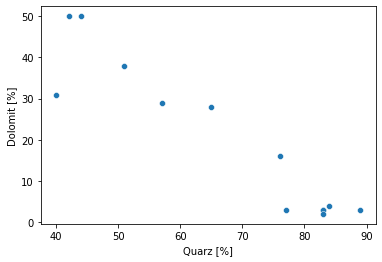

In [7]:
# strongest trend among above plots
sns.scatterplot(x='Quarz',y='Dolomit',data=bo209_Schultz)
plt.xlabel('Quarz [%]')
plt.ylabel('Dolomit [%]')

<div class="alert alert-info">
### XRD analyses ADM
There are some trends between minerals, but not between minerals and depth.

In [8]:
# select data analysed by ADM method
bo209_ADM=bo209.loc[bo209['methods']=='ADM']
bo209_ADM

,sample,methods,Quarz,K-Feldspat,Plagioklas,Calcit,Dolomit,depth
1,B209-49,ADM,82,4,6,3,5,1630.05
3,B209-50,ADM,44,7,8,3,38,1630.30
5,B209-51,ADM,55,9,6,0,30,1630.90
7,B209-52,ADM,57,5,7,0,31,1631.25
9,B209-53,ADM,71,6,5,0,18,1631.65
11,B209-54,ADM,42,16,6,0,36,1631.80
13,B209-55,ADM,90,2,2,3,3,1632.20
15,B209-56,ADM,81,6,5,4,4,1632.75
17,B209-57,ADM,84,2,5,6,3,1633.20
19,B209-58,ADM,36,5,5,0,54,1633.48


Text(0.5, 1.02, 'XRD measured mineralogical data (ADM)')

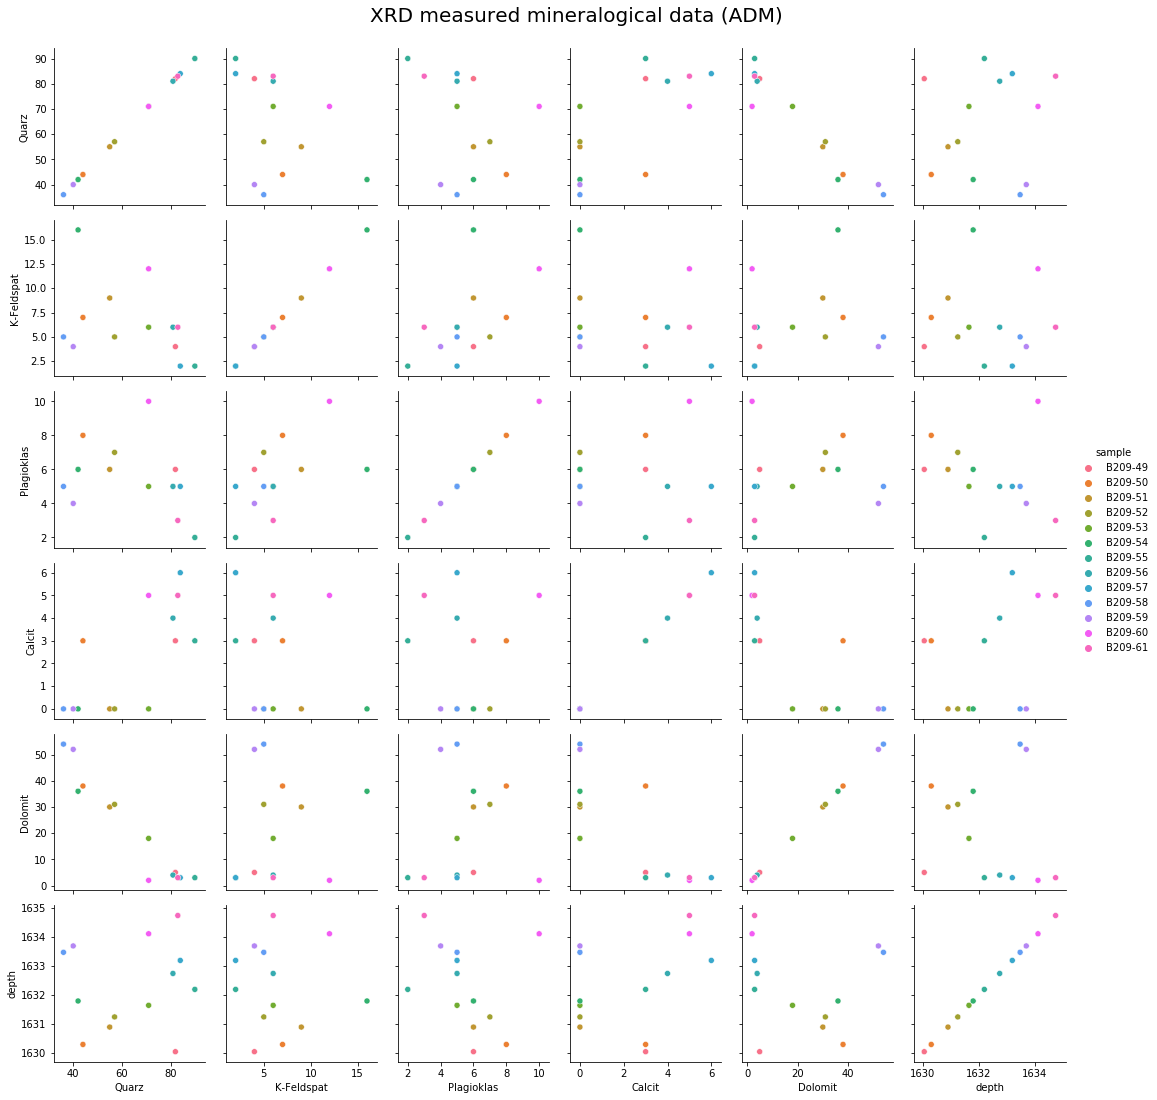

In [9]:
g = sns.PairGrid(bo209_ADM, hue="sample")
g.map(sns.scatterplot)
g.add_legend()
g.fig.suptitle("XRD measured mineralogical data (ADM)",y=1.02,size=20)

C:\Users\dell\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.02, 'XRD measured mineralogical data (ADM)')

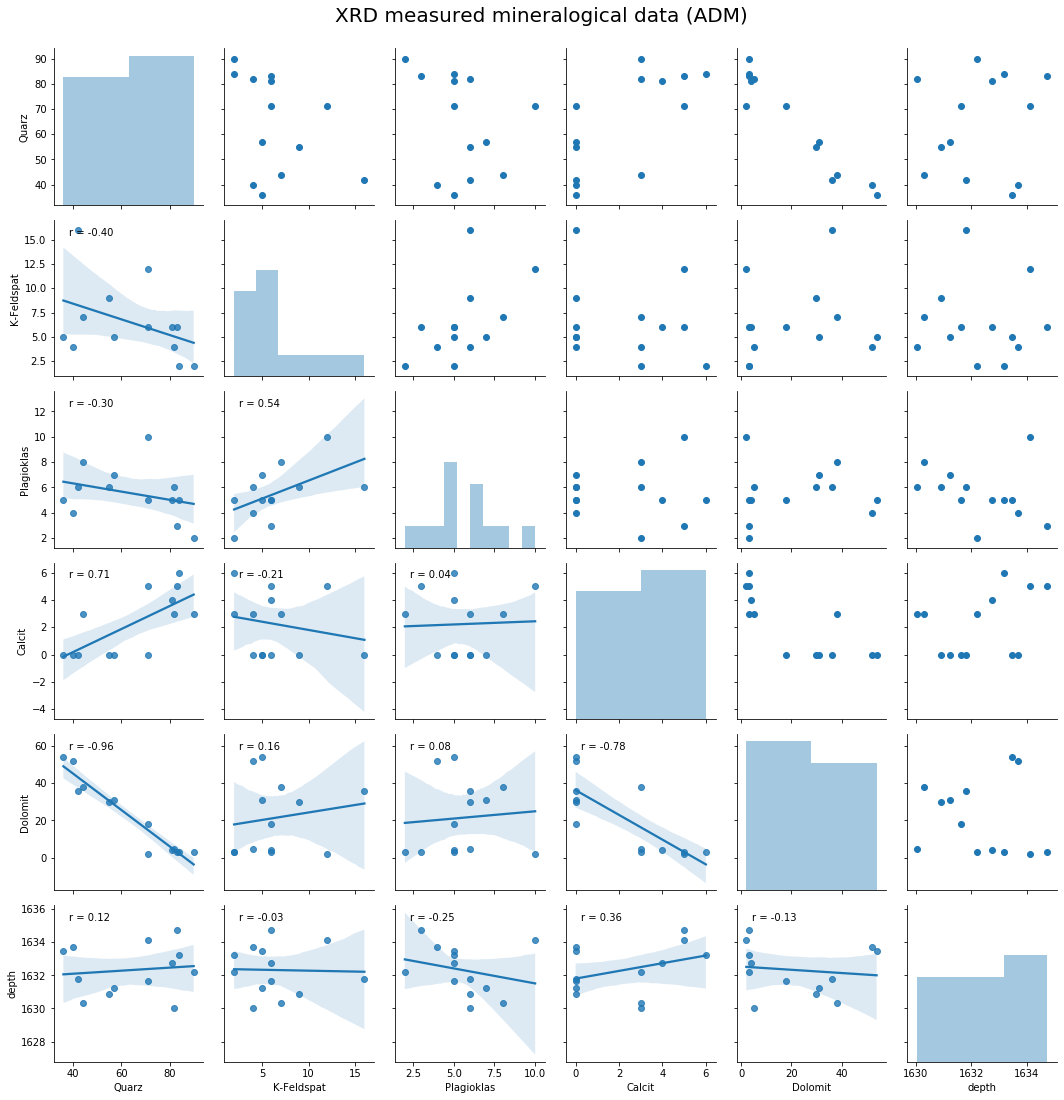

In [10]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(bo209_ADM)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.regplot)
g.map_lower(corrfunc)
g.fig.suptitle("XRD measured mineralogical data (ADM)",y=1.02,size=20)

<div class="alert alert-info">
### XRD measured mineralogical data for samples from Bo209
<div class="alert alert-success">
#### Schultz
#### ADM

<div class="alert alert-warning">
Compare XRD analyses Schultz vs ADM, are these two methods sensitive to different minerals?

Text(0.5, 0.98, 'Schultz versus ADM')

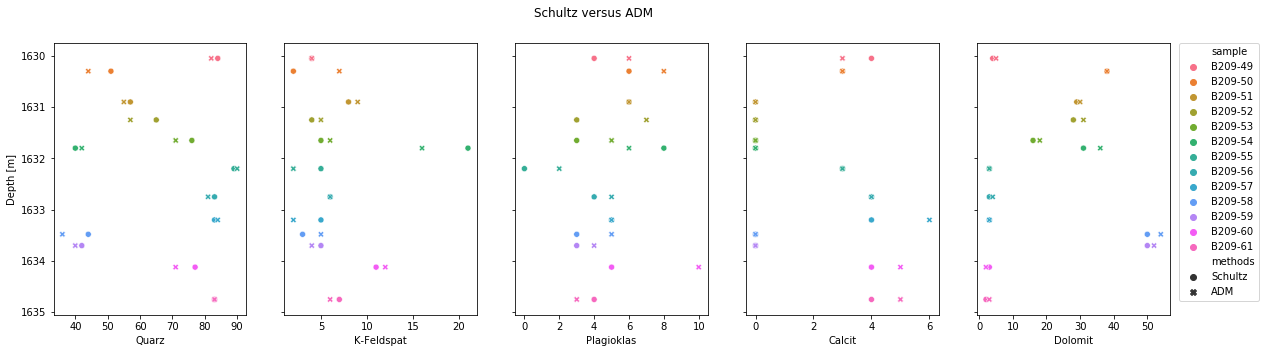

In [11]:
fig,ax = plt.subplots(1, 5, figsize=(20,5 ), sharey=True)
sns.scatterplot(data=bo209, x="Quarz", y="depth", hue="sample", style="methods",legend=False,ax=ax[0])
sns.scatterplot(data=bo209, x="K-Feldspat", y="depth", hue="sample", style="methods",legend=False,ax=ax[1])
sns.scatterplot(data=bo209, x="Plagioklas", y="depth", hue="sample", style="methods",legend=False,ax=ax[2])
sns.scatterplot(data=bo209, x="Calcit", y="depth", hue="sample", style="methods",legend=False,ax=ax[3])
sns.scatterplot(data=bo209, x="Dolomit", y="depth", hue="sample", style="methods",legend='auto',ax=ax[4].invert_yaxis())
ax[0].set_ylabel('Depth [m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle('Schultz versus ADM')

<div class="alert alert-success">
Percent stacked barplot

([<matplotlib.axis.XTick at 0x28715297a58>,
 <a list of 2 Text xticklabel objects>)

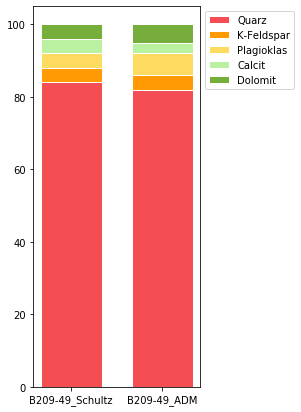

In [12]:
# Percent stacked barplot 

sn = 0 #sample number, here in total 13 samples. Enter the number, you can compare the sample anaysied in two methods.
r=[0,0.3]
xaxis_name = (bo209.iloc[sn,0]+"_"+bo209.iloc[sn,1],bo209.iloc[sn+1,0]+"_"+bo209.iloc[sn+1,1])

barWidth = 0.2
mineral_1=list(bo209['Quarz'][sn:sn+2])
mineral_2=list(bo209['K-Feldspat'][sn:sn+2])
mineral_3=list(bo209['Plagioklas'][sn:sn+2])
mineral_4=list(bo209['Calcit'][sn:sn+2])
mineral_5=list(bo209['Dolomit'][sn:sn+2])

plt.figure(figsize=(3,7))
plt.bar(r, mineral_1, color='#F44E54', edgecolor='white', width=barWidth,label="Quarz")
plt.bar(r, mineral_2, 
        bottom=mineral_1,
        color='#FF9904', edgecolor='white', width=barWidth,label="K-Feldspar")
plt.bar(r, mineral_3, 
        bottom=[i+j for i,j in zip(mineral_1,mineral_2)],
        color='#FDDB5E', edgecolor='white', width=barWidth,label="Plagioklas")
plt.bar(r, mineral_4, 
        bottom=[i+j+k for i,j,k in zip(mineral_1, mineral_2, mineral_3)],
        color='#BAF1A1', edgecolor='white', width=barWidth,label="Calcit")
plt.bar(r, mineral_5, 
        bottom=[i+j+k+l for i,j,k,l in zip(mineral_1, mineral_2, mineral_3,mineral_4)],
        color='#76AD3B', edgecolor='white', width=barWidth,label="Dolomit")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Custom x axis
plt.xticks(r, xaxis_name)
# plt.xlabel("same sample in different methods,Schultz (left) and ADM (right)",size=15)